In [1]:
import requests
import io
import base64
from PIL import Image
import matplotlib.pyplot as plt


In [26]:
content_img = requests.get("https://picsum.photos/500/500").content
style_img = requests.get("https://www.vangoghgallery.com/img/starry_night_full.jpg").content

img_1 = Image.open(io.BytesIO(content_img))
img_2 = Image.open(io.BytesIO(style_img))

# convert to base64 string
content_img_64 = base64.b64encode(content_img).decode("utf-8")
style_img_64 = base64.b64encode(style_img).decode("utf-8")

files = [
    ('content_img', content_img_64),
    ('style_img', style_img_64)
]

In [27]:
response = requests.post("http://localhost:8000/transfer", files=files)
response.json()

{'message': 'Images transferred successfully!',
 'result_image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDzueTyXWQJu8wcnO32qawLF8x5UAdRz/OmTj94A9uNw54bBFSWZBbIUMrehx+ea9uKjfU422zoPDtiVDjfsEhwD/M/rXZJpw2iNJwm7O

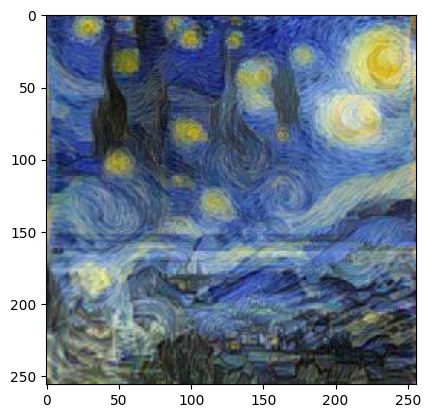

In [28]:
image = Image.open(io.BytesIO(base64.b64decode(response.json()['result_image'])))
plt.imshow(image)
plt.show()